# ch10 데이터 프레임과 시리즈
    - $pip install pandas (cmd)
    - Anaconda에 포함되어 있음

### 1. 판다스 패키지
    - 데이터 분석을 위한 패키지
    - Numpy 기반, 다른 라이브러리와도 잘 통합
    - 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터 프레임 제공
    - 결측치 처리, 크기 변경(열삭제, 행삭제, 열추가, 행추가), 데이터 정렬, 데이터 분할/병합, 통계처리, 데이터 추출, 파일 입출력, 라벨링, 시각화, ...

In [4]:
import pandas as pd
pd.__version__

'2.1.4'

In [5]:
data = pd.read_json('data/ch10_member1.json', encoding='cp949') # encoding default : 'utf-8'
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [6]:
data = pd.read_json('data/ch10_member2.json')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [7]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names=['name','age','email','address'])
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


### 2. 데이터프레임 만들기
    - 1) 딕셔너리 사용하여 데이터프레임 만들기
    - 2) 리스트 사용하여 데이터프레임 만들기
    - 3) read_csv()
    - 4) sklearn, statsmodels, seaborn 등의 라이브러리에서 데이터프레임 불러오기

In [8]:
# 1) 딕셔너리 사용
d1 = {'name':['홍길동','신길동'], 'age':[20,30]}
df1 = pd.DataFrame(data=d1)
df1

,name,age
0,홍길동,20
1,신길동,30


In [9]:
# 2) 리스트 사용
d2 = [{'name':'홍길동', 'age':20}, {'name':'신길동', 'age':30}]
df2 = pd.DataFrame(data=d2)
df2

,name,age
0,홍길동,20
1,신길동,30


In [10]:
# 3) read_csv()
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
print(df.shape)
df.head(2)
df.tail(2)
df.sample()

(17, 22)


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [11]:
pd.options.display.max_columns

20

In [12]:
# 4) statsmodels 사용
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris', package='datasets').data
iris.tail(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 3. 이름(행, 열) 지정하기

In [13]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df = pd.concat([member_df, member_df])
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [14]:
# 행 이름, 열 이름 지정
member_df.index = range(len(member_df))
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [15]:
# set index
member_df.set_index("name", inplace=True)
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,gil@hong.com,서울시 강남구
김길북,20,kim@hong.com,서울시 강북구
신길서,40,park@hong.com,서울시 강서구
신길동,28,park@hong.com,서울시 강서동
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,gil@hong.com,서울시 강남구


In [16]:
# reset index
member_df.reset_index(inplace=True)
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [17]:
# 한 열만 가져올 때
print(type(member_df['name'])) # 결과: 시리즈
member_df['name']

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     김길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     김길북
10    신길서
11    신길동
Name: name, dtype: object

In [18]:
# 한 행만 가져올 때 (loc[])
print(type(member_df.loc[0]))
member_df.loc[0]

<class 'pandas.core.series.Series'>


name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [19]:
# 한 열의 데이터 타입을 변경 (astype)
member_df['age'] = member_df['age'].astype('float64')
member_df

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,서울시 강서구
2,박길남,23.0,gil@hong.com,서울시 강남구
3,김길북,20.0,kim@hong.com,서울시 강북구
4,신길서,40.0,park@hong.com,서울시 강서구
5,신길동,28.0,park@hong.com,서울시 강서동
6,홍길동,20.0,hong@hong.com,서울시 강동구
7,박길서,33.0,park@hong.com,서울시 강서구
8,박길남,23.0,gil@hong.com,서울시 강남구
9,김길북,20.0,kim@hong.com,서울시 강북구


### 4. 부분 데이터 조회
    - 특정열, 특정행, 특정행의 특정열, 특정조건의 행, 특정조건의 열, ... 모두 조회 가능하다
    1) 단일열 조회
    2) 이름으로 조회 (loc[])
    3) 인덱스로 조회 (iloc[])
    4) 조건으로 조회

In [20]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [21]:
# 1) 단일열 조회
member['name'].to_frame() #시리즈->데이터프레임

,name
0,홍길동
1,박길서
2,박길남
3,김길북
4,신길서
5,신길동


In [22]:
# 2) 이름으로 조회 loc[]

# 1행부터 4행까지 name과 email만
member.loc[1:4, ['name','email']]

,name,email
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,park@hong.com


In [23]:
# 3) 인덱스로 조회 iloc[]
member.iloc[-1::-1, 0]

5    신길동
4    신길서
3    김길북
2    박길남
1    박길서
0    홍길동
Name: name, dtype: object

In [24]:
# 4) 조건으로 조회
member.loc[member['age']>30]

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
4,신길서,40,park@hong.com,서울시 강서구


In [25]:
member.loc[ member['address'].str.find('강서구')!=-1, ['name', 'age', 'address'] ]

,name,age,address
1,박길서,33,서울시 강서구
4,신길서,40,서울시 강서구


In [26]:
print(member.isna()) #결측치 여부 확인
print(member.isna().sum())

    name    age  email  address
0  False  False  False    False
1  False  False  False    False
2  False  False  False    False
3  False  False  False    False
4  False  False  False    False
5  False  False  False    False
name       0
age        0
email      0
address    0
dtype: int64


In [27]:
# 붖꽃 데이터 가져오기
import seaborn as sns
iris_df = sns.load_dataset('iris')

In [28]:
# species가 versicolor인 데이터의 상위 5개의 열
iris_df[iris_df['species']=='versicolor'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [29]:
# species가 vesicolor인 데이터의 맨 마지막 열을 제외한 데이터
# sol 1)
iris_df.loc[iris_df['species']=='versicolor', ['sepal_length','sepal_width','petal_length', 'petal_width']].head(5)
# sol 2)
iris_df.iloc[:,:-1][iris_df['species']=='versicolor'].head(5)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [30]:
# sepal_length가 6.2보다 크고, species가 versicolor인 데이터를 sepal정보와 species만 출력
iris_df.loc[ (iris_df['sepal_length']>=6.2) & (iris_df['species']=='versicolor'), 
         ['sepal_length','sepal_width','species'] ].head(5)

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor


### 5. 데이터 추가 및 삭제

In [31]:
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [32]:
# 데이터 추가
import numpy as np
member['major'] = ['컴공', '기계', 'AI', '전기', '전자', np.nan]
hobby = pd.DataFrame( {'hobby':['놀기','자기','책읽기','공부','먹기','운동']} )
member = pd.concat([member, hobby], axis=1) # default:행병합, axis=1:열병합 
member

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,놀기
1,박길서,33,park@hong.com,서울시 강서구,기계,자기
2,박길남,23,gil@hong.com,서울시 강남구,AI,책읽기
3,김길북,20,kim@hong.com,서울시 강북구,전기,공부
4,신길서,40,park@hong.com,서울시 강서구,전자,먹기
5,신길동,28,park@hong.com,서울시 강서동,NaN,운동


In [33]:
# 데이터 삭제 (행)
member = member.drop(4, axis=0)
member.index = range(len(member)) #index재정비

# 데이터 삭제 (열)
member = member.drop(['hobby', 'major'], axis=1)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길동,28,park@hong.com,서울시 강서동


### 6. 정렬

In [34]:
# index sort
member.sort_index(ascending=False)

,name,age,email,address
4,신길동,28,park@hong.com,서울시 강서동
3,김길북,20,kim@hong.com,서울시 강북구
2,박길남,23,gil@hong.com,서울시 강남구
1,박길서,33,park@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


In [35]:
# name sort -> age sort
member.sort_values(by=['name','age'], ascending=True)

,name,age,email,address
3,김길북,20,kim@hong.com,서울시 강북구
2,박길남,23,gil@hong.com,서울시 강남구
1,박길서,33,park@hong.com,서울시 강서구
4,신길동,28,park@hong.com,서울시 강서동
0,홍길동,20,hong@hong.com,서울시 강동구


### 7. 기초 통계 분석
    - count : NA(결측치)를 제외한 개수
    - min, max
    - sum, cumprod(누적합)
    - mean, median
    - quantile(분위수)
    - var, std
    - corr (상관관계)

In [36]:
iris_df.min(axis=0) # default:axis=0

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [37]:
print('min :\n', iris_df.min(axis=0)) # default:axis=0
print('\nmean :\n', iris_df.iloc[:,:-1].mean())
print('\nstd :\n', iris_df.iloc[:,:-1].std())

min :
 sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

mean :
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

std :
 sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


In [38]:
# 수치형데이터의 개수, 평균, 표준편차, 최소최대, 사분위수
iris_df.describe()  #수치형 데이터만
iris_df['species'].describe()  #범주형 데이터만
iris_df.describe(include='all')  #수치형+범주형 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### 8. 그룹화

In [39]:
# species 그룹별 평균
iris_df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### 9. 연습문제

In [40]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,setosa


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


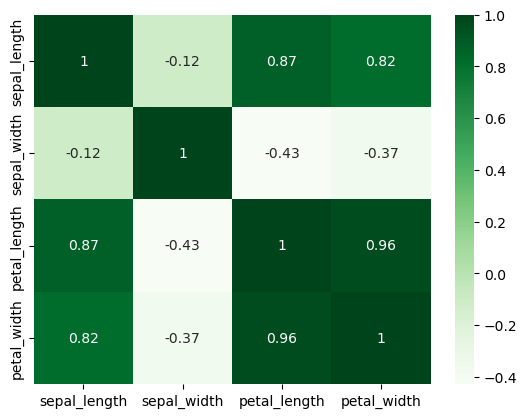

In [41]:
# 1)
iris.head(5)
# 2)
X = iris.loc[:,'sepal_length'].to_frame()
Y = iris.loc[:,'species'].to_frame()
# 3)
temp = iris.head(50)
# 4)
temp.describe(include='all')
# 5)
iris_versicolor = iris[iris['species'] == 'versicolor']
# 6)
iris_df = pd.concat([X,Y], axis=1)
# 7)
iris.iloc[:,:-1].mean()
# 8)
r = iris.iloc[:,:-1].corr()

import seaborn as sns
sns.heatmap(r, annot=True, cmap="Greens")
# 9)
iris.groupby('species').mean()